In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np

In [7]:
data=pd.read_csv('/content/drive/MyDrive/ml_data/Transaction_Naration_Data_Set.csv')
data.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.0,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.0,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.0,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [8]:
cols=['NARATION']
duplicates = data.duplicated(subset=cols,keep=False)
print(duplicates)

0           True
1           True
2           True
3           True
4           True
            ... 
22546753    True
22546754    True
22546755    True
22546756    True
22546757    True
Length: 22546758, dtype: bool


In [ ]:
print("Number of duplicates:", duplicates.sum())

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22546758 entries, 0 to 22546757
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   AC_ID       int64  
 2   AMOUNT      float64
 3   DOC_DATE    object 
 4   NARATION    object 
 5   DR_CR       object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ GB


In [9]:

sub_data = data.drop_duplicates(subset=cols)
sub_data.info()
# sub_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128604 entries, 0 to 22544595
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  128604 non-null  int64  
 1   AC_ID       128604 non-null  int64  
 2   AMOUNT      128604 non-null  float64
 3   DOC_DATE    128604 non-null  object 
 4   NARATION    128603 non-null  object 
 5   DR_CR       128604 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [6]:
sub_data.isnull().sum()

Unnamed: 0    0
AC_ID         0
AMOUNT        0
DOC_DATE      0
NARATION      1
DR_CR         0
dtype: int64

In [10]:
sub_data.dropna(subset=['NARATION'],inplace=True)
sub_data.isnull().sum()
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128603 entries, 0 to 22544595
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  128603 non-null  int64  
 1   AC_ID       128603 non-null  int64  
 2   AMOUNT      128603 non-null  float64
 3   DOC_DATE    128603 non-null  object 
 4   NARATION    128603 non-null  object 
 5   DR_CR       128603 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


<ipython-input-10-4bbea3cc1cd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.dropna(subset=['NARATION'],inplace=True)


In [11]:
narations=sub_data[['NARATION','AC_ID']].copy()
narations.tail()

,NARATION,AC_ID
22538287,Guatala Udc,4010179
22539045,"Transaction For Fund Transfer. Smart App, Regu...",4199653
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন,2389876
22543261,আসাদ ভাই এর কাছে জমা হাজার টাকা,4817300
22544595,গাড়ামাসি পল্লী উন্নয়ন সমবায় সমিতি আস সেবা আদ...,789386


In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_trf


In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")

def name_removal(text):
  doc=nlp(text)
  sz=len(doc.ents)
  modified_string = ""
  if(sz>0):
    for entity in doc.ents:
        entity=entity.text
        # if entity.label_ == "PERSON":
        #     filtered_text += entity.text + " "
        modified_string = text.replace(entity, "")
  else:
    modified_string=text
  return modified_string

In [26]:
narations.shape

(128603, 2)

In [32]:
txt=name_removal(narations['NARATION'][6])
txt

'Cash Deposit to A/C No.: '

In [33]:
narations['no_name']=narations['NARATION'].apply(name_removal)

In [ ]:
empty_string_rows = narations[narations['NARATION'] == '']
print(empty_string_rows)

         NARATION    AC_ID
1001               2199100
3582                396866
181022             4737925
201752             5147845
300064             5816604
...           ...      ...
19203763             68159
19393945           1624246
20358417           4737925
20504419           3762714
21729143           4737925

[70 rows x 2 columns]


In [34]:
narations['no_name']=narations['no_name'].str.replace('[^A-Za-z\s]', '',regex=True)
narations.tail()

,NARATION,AC_ID,no_name
22538287,Guatala Udc,4010179,
22539045,"Transaction For Fund Transfer. Smart App, Regu...",4199653,Transaction For Fund Transfer Regular Fund Tr...
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন,2389876,Cash Deposit
22543261,আসাদ ভাই এর কাছে জমা হাজার টাকা,4817300,
22544595,গাড়ামাসি পল্লী উন্নয়ন সমবায় সমিতি আস সেবা আদ...,789386,


In [36]:
empty_string_rows = narations[narations['no_name'] == '']
print(empty_string_rows)

                 NARATION    AC_ID no_name
1001                    -  2199100        
1876               SHAJIB  4044420        
3582                   -=   396866        
10007          BARACHOWNA   507327        
10221        yesin billha  3415318        
...                   ...      ...     ...
22329190  Mollikpur-Aleya  5425789        
22329306      SUBRATA DAS   692599        
22337049           mahbub   235321        
22346473   LOKMAN HOSSAIN  4766106        
22359757    naora khadija  5412929        

[4461 rows x 3 columns]


In [ ]:
narations = narations[narations['no_name'] != '']
narations = narations.reset_index(drop=True)

In [37]:
narations = narations[~narations['no_name'].str.strip().eq("")]   # truncate bengali as those are just spaces
narations = narations.reset_index(drop=True)

In [38]:
narations.tail()

,NARATION,AC_ID,no_name
121123,"Smart App, Fund Transfer. wife DPS Money",652566,Smart App Fund Transfer wife
121124,Cash Deposit Suraighat bazar SME,5418855,Cash Deposit Suraighat bazar
121125,Cash Deposit Raigor Mohila dol,5418855,Cash Deposit Raigor Mohila
121126,"Transaction For Fund Transfer. Smart App, Regu...",4199653,Transaction For Fund Transfer Regular Fund Tr...
121127,Cash Deposit গারামাসি উল্লী উন্নয়ন,2389876,Cash Deposit


In [39]:
narations.head()

,NARATION,AC_ID,no_name
0,Cash Withdraw,3644877,Cash Withdraw
1,Cash Withdrawal From A/C No.:,1175256,Cash Withdrawal From AC No
2,"Cash withdraw from Micro Merchant point, MM A/C",2298226,Cash withdraw from Micro Merchant point
3,Credit Against Merchant Cash Withdraw Service ...,4066427,Credit Against Merchant Cash Withdraw Service ...
4,Cash Deposit to A/C No.:,38418,Cash Deposit to AC No


In [ ]:
txt=name_removal(narations['NARATION'][3])
txt

''

In [ ]:
narations.isnull().sum()

In [40]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 

stop_words=set(stopwords.words('english'))

ps = PorterStemmer()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:

nltk.download('names')
name_dictionary = nltk.corpus.names.words()

def find_person_names(text, name_dictionary):
    person_names = []
    words = text.split()
    for word in words:
        if word.capitalize() in name_dictionary:
            person_names.append(word)
    return person_names



[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


In [ ]:
name_dictionary

In [ ]:
narations['NARATION'][255]

'Rakib Hasan Roll Hu'

In [ ]:
txt=find_person_names("Josh is my friend",name_dictionary)
txt

['Josh']

In [ ]:
stop_words.add('cash')

In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'cash',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 '

In [41]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
%pwd


'/kaggle/working'

In [ ]:
%cd /usr/share/nltk_data/corpora

/usr/share/nltk_data/corpora


In [ ]:
%ls

abc/                     kimmo/                 sentence_polarity/
abc.zip                  kimmo.zip              sentence_polarity.zip
alpino/                  knbc.zip               sentiwordnet/
alpino.zip               lin_thesaurus/         sentiwordnet.zip
biocreative_ppi/         lin_thesaurus.zip      shakespeare/
biocreative_ppi.zip      mac_morpho/            shakespeare.zip
brown/                   mac_morpho.zip         sinica_treebank/
brown.zip                machado.zip            sinica_treebank.zip
brown_tei/               masc_tagged.zip        smultron/
brown_tei.zip            movie_reviews/         smultron.zip
cess_cat/                movie_reviews.zip      state_union/
cess_cat.zip             mte_teip5/             state_union.zip
cess_esp/                mte_teip5.zip          stopwords/
cess_esp.zip             names/                 stopwords.zip
chat80/                  names.zip              subjectivity/
chat80.zip               nps_chat/              sub

In [ ]:
! unzip "/usr/share/nltk_data/corpora/wordnet.zip"

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: wordnet/
  inflating: wordnet/lexnames        
  inflating: wordnet/data.verb       
  inflating: wordnet/index.adv       
  inflating: wordnet/adv.exc         
  inflating: wordnet/index.verb      
  inflating: wordnet/cntlist.rev     
  inflating: wordnet/data.adj        
  inflating: wordnet/index.adj       
  inflating: wordnet/LICENSE         
  inflating: wordnet/citation.bib    
  inflating: wordnet/noun.exc        
  inflating: wordnet/verb.exc        
  inflating: wordnet/README          
  inflating: wordnet/index.sense     
  inflating: wordnet/data.noun       
  inflating: wordnet/data.adv        
  inflating: wordnet/index.noun      
  inflating: wordnet/adj.exc         


In [ ]:
%cd /kaggle/working

/kaggle/working


In [42]:
lematizer = WordNetLemmatizer()
lematizer.lemmatize("words")

'word'

In [43]:
def tokenize(text):
    return [lematizer.lemmatize(w) for w in word_tokenize(text) if not w in stop_words]
narations['no_name']=narations['no_name'].str.lower()
narations.head()

,NARATION,AC_ID,no_name
0,Cash Withdraw,3644877,cash withdraw
1,Cash Withdrawal From A/C No.:,1175256,cash withdrawal from ac no
2,"Cash withdraw from Micro Merchant point, MM A/C",2298226,cash withdraw from micro merchant point
3,Credit Against Merchant Cash Withdraw Service ...,4066427,credit against merchant cash withdraw service ...
4,Cash Deposit to A/C No.:,38418,cash deposit to ac no


In [44]:
narations['no_name'] = narations['no_name'].apply(tokenize)
narations.head()

,NARATION,AC_ID,no_name
0,Cash Withdraw,3644877,"[cash, withdraw]"
1,Cash Withdrawal From A/C No.:,1175256,"[cash, withdrawal, ac]"
2,"Cash withdraw from Micro Merchant point, MM A/C",2298226,"[cash, withdraw, micro, merchant, point]"
3,Credit Against Merchant Cash Withdraw Service ...,4066427,"[credit, merchant, cash, withdraw, service, ac]"
4,Cash Deposit to A/C No.:,38418,"[cash, deposit, ac]"


In [45]:
tokens=narations['NARATION'].tolist()
narations['st_tokens']=narations['no_name']
narations=narations.drop('NARATION',axis=1)
# narations['st_tokens'] = narations['NARATION'].apply(lambda x: [ps.stem(word) for word in x])

In [46]:
narations.head()

,AC_ID,no_name,st_tokens
0,3644877,"[cash, withdraw]","[cash, withdraw]"
1,1175256,"[cash, withdrawal, ac]","[cash, withdrawal, ac]"
2,2298226,"[cash, withdraw, micro, merchant, point]","[cash, withdraw, micro, merchant, point]"
3,4066427,"[credit, merchant, cash, withdraw, service, ac]","[credit, merchant, cash, withdraw, service, ac]"
4,38418,"[cash, deposit, ac]","[cash, deposit, ac]"


In [47]:
narations=narations.drop('no_name',axis=1)

In [48]:
# narations = narations.drop('NARATION', axis=1)
narations.head()

,AC_ID,st_tokens
0,3644877,"[cash, withdraw]"
1,1175256,"[cash, withdrawal, ac]"
2,2298226,"[cash, withdraw, micro, merchant, point]"
3,4066427,"[credit, merchant, cash, withdraw, service, ac]"
4,38418,"[cash, deposit, ac]"


In [3]:

def to_list(text,ls):
  
  for x in text:
    ls.append(x)
    

In [4]:
t_list=list()
for index, row in narations.iterrows():
    # print("Row Index:", index)
    # print("Column 1:", row['st_tokens'])
    to_list(row['st_tokens'],t_list)

NameError: ignored

In [93]:
t_list[:10]

['cash',
 'withdraw',
 'cash',
 'withdrawal',
 'ac',
 'cash',
 'withdraw',
 'micro',
 'merchant',
 'point']

In [108]:
import matplotlib.pyplot as plt


In [2]:

token_frequencies = t_list.count('cash')
token_frequencies

NameError: ignored

In [1]:
token_frequencies = {token: t_list.count(token) for token in t_list}

# Sort the tokens by frequency in descending order
sorted_tokens = sorted(token_frequencies.items(), key=lambda x: x[1], reverse=True)

# Separate the tokens and frequencies for plotting
sorted_tokens, frequencies = zip(*sorted_tokens)

# Plot the token distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_tokens)), frequencies)
plt.xticks(range(len(sorted_tokens)), sorted_tokens, rotation=45)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Token Distribution')
plt.tight_layout()
plt.show()

NameError: ignored

In [101]:
token_list=narations['st_tokens'].tolist()

In [102]:
from gensim.models import Word2Vec

# Assuming 'tokens' is a list of tokenized documents
model = Word2Vec(token_list,min_count=1)
# X = [model[token] for token in tokens]



In [103]:
# X = [model[token] for token in tlist]
print(model)

Word2Vec<vocab=29821, vector_size=100, alpha=0.025>


In [104]:
t_words=model.wv.get_normed_vectors()
print(t_words)

[[-0.05025823  0.05885948  0.15298453 ... -0.01456005 -0.15671103
   0.27569836]
 [-0.0256922  -0.00921846  0.15108538 ... -0.106529   -0.18352996
  -0.11074492]
 [-0.06389433  0.22184426  0.09105052 ... -0.01696318 -0.08006246
  -0.00919911]
 ...
 [-0.08275154  0.08751228 -0.09460936 ... -0.03092741 -0.09852762
  -0.00281331]
 [-0.04581774  0.14124598  0.13136163 ...  0.16093864 -0.16463889
   0.03299479]
 [-0.10655071  0.2051845   0.02243524 ... -0.0463895   0.07329647
   0.06470696]]


In [105]:
print(model.wv.get_vector("withdraw", norm=True))

[-0.04963248  0.18182303  0.04590592  0.15512633  0.01525612 -0.15666851
 -0.04294953  0.05081056 -0.04342353 -0.09143724 -0.03513817  0.03924473
  0.02760534  0.05177506  0.18960632 -0.03543645  0.18157908  0.09280758
 -0.30063316  0.00135898 -0.07734371  0.08122929 -0.03194524 -0.07275987
 -0.03292605  0.05670453 -0.05325881  0.05733931 -0.09937891  0.065571
  0.11585244 -0.00279741 -0.1070388  -0.12303871 -0.11633062  0.03777803
  0.16396508 -0.02478883 -0.0766813   0.1696893   0.05140898  0.12422208
  0.10832338 -0.0160222   0.04233886  0.01380049 -0.03527202 -0.08661538
  0.06374739 -0.08510115  0.04363981 -0.16584705 -0.14804032 -0.19075952
 -0.16496067  0.12429484  0.01622902  0.08666606 -0.00232593  0.08308371
  0.13321273  0.09532047  0.07421363 -0.01880606  0.0464652   0.16719478
 -0.02812101  0.14867656 -0.11008611 -0.07682707  0.05399865 -0.04992559
  0.03340019  0.06687181 -0.03407997  0.08685154  0.06179532  0.12107708
 -0.18090178 -0.14922725 -0.18669066  0.03162235 -0.0

In [ ]:
# print(model.wv.most_similar('ac'))

In [ ]:
# def vectorize(text):
#     return [model.wv.get_vector(w ,norm=True) for w in word_tokenize(text)]

In [ ]:
# tokens_trx['vectorized']=tokens_trx['NARATION'].apply(vectorize)
# print(vectorize(tokens_trx['NARATION'][0][1]))

In [106]:
narations['vectorized'] = narations['st_tokens'].apply(lambda x: [model.wv.get_vector(word ,norm=True) for word in x])

In [107]:
narations.head()

,AC_ID,st_tokens,vectorized
0,3644877,"[cash, withdraw]","[[-0.025692198, -0.009218461, 0.15108538, 0.35..."
1,1175256,"[cash, withdrawal, ac]","[[-0.025692198, -0.009218461, 0.15108538, 0.35..."
2,2298226,"[cash, withdraw, micro, merchant, point]","[[-0.025692198, -0.009218461, 0.15108538, 0.35..."
3,4066427,"[credit, merchant, cash, withdraw, service, ac]","[[-0.04906462, 0.11778105, 0.07305838, 0.08519..."
4,38418,"[cash, deposit, ac]","[[-0.025692198, -0.009218461, 0.15108538, 0.35..."


In [ ]:
# avg vectorized
def avg_vec(vectors):
    s_vec=np.zeros(100)
    cnt=0
    for v in vectors:
        cnt+=1
        s_vec+=v
    s_res=s_vec/cnt
    return s_res
#     print(s_vec)
#     print(s_vec/cnt)
        
    

In [ ]:
# avg_vec(narations['vectorized'][12])

In [ ]:
narations['avg_vec']=narations['vectorized'].apply(avg_vec)

In [ ]:
narations['vectorized'][0]

In [ ]:
narations['avg_vec'][0]

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 12, init = 'k-means++', max_iter = 300, n_init = 12, random_state = None)
# v_tokens=model.wv.get_normed_vectors()
avg_vec_list=narations['avg_vec'].tolist()
# type(avg_vec_list)
kmeans.fit(avg_vec_list)



KMeans(n_clusters=12, n_init=12)

In [ ]:
print(len(kmeans.labels_))

128603


In [ ]:
narations[:15]

In [ ]:
def pred (vec):
    p = kmeans.predict(vec.reshape(1,-1))
    return p

In [ ]:
narations['k_cat']=narations['avg_vec'].apply(pred)

In [ ]:
narations

,AC_ID,st_tokens,vectorized,avg_vec,k_cat
0,3644877,"[cash, withdraw]","[[0.05546305, -0.09003913, 0.17263333, 0.09532...","[0.028928336997826893, -0.017468220243851345, ...",[5]
1,1175256,"[cash, withdrawal, ac]","[[0.05546305, -0.09003913, 0.17263333, 0.09532...","[0.02947409078478813, -0.0786243664721648, 0.1...",[5]
2,2298226,"[cash, withdraw, micro, merchant, point, mm, ac]","[[0.05546305, -0.09003913, 0.17263333, 0.09532...","[-0.2763608197371165, -0.031034197968741257, 0...",[0]
3,4066427,"[credit, merchant, cash, withdraw, service, ac]","[[-0.05258243, 0.02658326, 0.08539264, -0.0291...","[-0.06611986830830574, -0.06158295335868994, 0...",[1]
6,38418,"[cash, deposit, ac]","[[0.05546305, -0.09003913, 0.17263333, 0.09532...","[0.028528079390525818, -0.0898306059340636, 0....",[9]
...,...,...,...,...,...
22538287,4010179,"[guatala, udc]","[[-0.021407986, -0.09990046, 0.103428625, 0.06...","[-0.013614260902007421, 0.006440142790476481, ...",[5]
22539045,4199653,"[transaction, fund, transfer, smart, app, regu...","[[-0.042089667, 0.112342104, 0.14747328, 0.092...","[-0.38815172435715795, 0.5741195728381475, 0.1...",[2]
22539930,2389876,"[cash, deposit]","[[0.05546305, -0.09003913, 0.17263333, 0.09532...","[-0.0015917693575223286, -0.09925717860460281,...",[9]
22543261,4817300,[],[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[5]


In [ ]:
import matplotlib.pyplot as plt


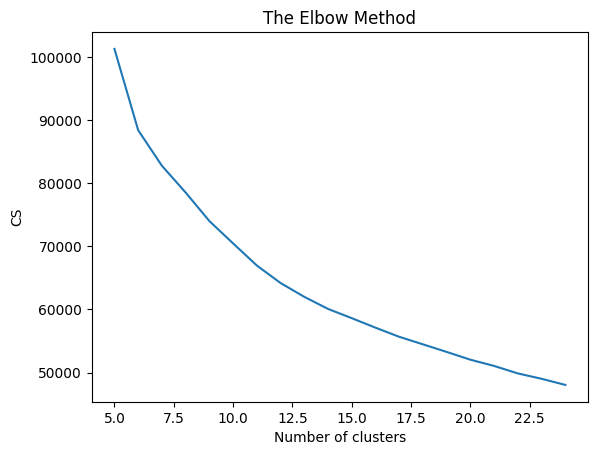

In [ ]:
cs = []
for i in range(5, 25):
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 12, random_state = None)
    kmeans2.fit(avg_vec_list)
    cs.append(kmeans2.inertia_)
plt.plot(range(5, 25), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
len(model.wv.get_vector('cash' ,norm=True))

In [ ]:
def pred(text):
    return [kmeans.predict(np.array([model.wv.get_vector('cash' ,norm=True)]

In [ ]:
# pred=kmeans.predict(np.array([model.wv.get_vector('cash' ,norm=True), model.wv.get_vector('withdraw' ,norm=True)]))
narations['preds'] = narations['vectorized'].apply(lambda x: [kmeans.predict(word.) for word in x])
# pred

<function matplotlib.pyplot.show(close=None, block=None)>

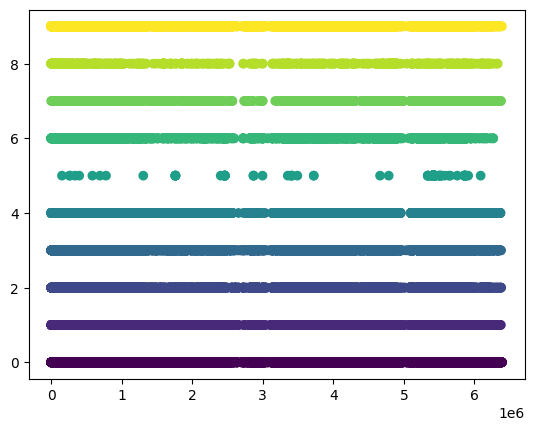

In [ ]:
plt.scatter(narations['AC_ID'],narations['k_cat'],c=narations['k_cat'])
plt.show

In [ ]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=5, min_samples=5).fit_predict(avg_vec_list)

    


In [ ]:
dbscan.labels_

In [ ]:
# def ds_pred(vec):
# #     p = kmeans.predict(vec.reshape(1,-1))
#     p=dbscan.fit_predict(vec.reshape(1,-1))
#     return p

In [ ]:
# print(ds_pred(narations['avg_vec'][0]))


In [ ]:
# print(ds_pred(narations['avg_vec'][3]))
# narations['db_cat']=narations['avg_vec'].apply(ds_pred)

In [ ]:
narations

,AC_ID,st_tokens,vectorized,sum_vec,k_cat
0,3644877,"[cash, withdraw]","[[-0.027002614, -0.03766817, 0.17229873, 0.185...","[-0.015129624555508295, -0.005336552858352661,...",[10]
1,1175256,"[cash, withdrawal, ac]","[[-0.027002614, -0.03766817, 0.17229873, 0.185...","[-0.011927357564369837, -0.061309092988570534,...",[10]
2,2298226,"[cash, withdraw, micro, merchant, point, mm, ac]","[[-0.027002614, -0.03766817, 0.17229873, 0.185...","[-0.3066883447269599, -0.005924145380655925, 0...",[1]
3,4066427,"[credit, merchant, cash, withdraw, service, ac]","[[-0.064798065, 0.054880656, 0.024779102, -0.0...","[-0.12975151215990385, -0.02486618235707283, 0...",[2]
6,38418,"[cash, deposit, ac]","[[-0.027002614, -0.03766817, 0.17229873, 0.185...","[-0.015825906147559483, -0.08448684091369311, ...",[3]
...,...,...,...,...,...
22538287,4010179,"[guatala, udc]","[[-0.0077656484, -0.089214176, 0.11665403, 0.0...","[0.004534072087456782, 0.006979448099931081, 0...",[10]
22539045,4199653,"[transaction, fund, transfer, smart, app, regu...","[[-0.053031206, 0.0760682, 0.110468015, 0.0956...","[-0.30309268304457265, 0.4987169274439414, 0.0...",[0]
22539930,2389876,"[cash, deposit]","[[-0.027002614, -0.03766817, 0.17229873, 0.185...","[-0.04081514601906141, -0.10027102629343669, 0...",[3]
22543261,4817300,[],[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]


In [ ]:
np.array_equal(narations['cat'], narations['db_cat'])

In [ ]:
sub_data['k_cluster']=narations['k_cat'].copy()

/tmp/ipykernel_339/1490945364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['k_cluster']=narations['k_cat'].copy()


In [ ]:
sub_data

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR,k_cluster
0,0,3644877,342800.0,01-NOV-22,Cash Withdraw,Debit,[10]
1,1,1175256,342800.0,01-NOV-22,Cash Withdrawal From A/C No.:,Credit,[10]
2,2,2298226,1500.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,[1]
3,3,4066427,1500.0,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit,[2]
6,6,38418,500.0,01-NOV-22,Cash Deposit to A/C No.:,Debit,[3]
...,...,...,...,...,...,...,...
22538287,22538287,4010179,44900.0,29-APR-23,Guatala Udc,Credit,[10]
22539045,22539045,4199653,20000.0,29-APR-23,"Transaction For Fund Transfer. Smart App, Regu...",Credit,[0]
22539930,22539930,2389876,100.0,29-APR-23,Cash Deposit গারামাসি উল্লী উন্নয়ন,Credit,[3]
22543261,22543261,4817300,34000.0,29-APR-23,আসাদ ভাই এর কাছে জমা হাজার টাকা,Credit,[10]


In [ ]:
sub_data.to_csv('output.csv', index=False)

In [ ]:
narations.to_csv('naration_vec.csv',index=False)